In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('house_price.csv',usecols = ['Neighborhood' , 'Exterior1st' , 'Exterior2nd' , 'SalePrice'])

In [4]:
df.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.iloc[:,:]
y = df.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33 , random_state =42)

In [8]:
x_test.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
892,Sawyer,HdBoard,HdBoard,154500
1105,NoRidge,HdBoard,HdBoard,325000
413,OldTown,WdShing,Wd Shng,115000
522,BrkSide,CemntBd,CmentBd,159000
1036,Timber,VinylSd,VinylSd,315500


## Mean Encoding --- Collecting The Mean Values

In [9]:
for i in x_train.columns:
    print(i , ':' , len(x_train[i].unique()) , ' labels')

Neighborhood : 25  labels
Exterior1st : 14  labels
Exterior2nd : 16  labels
SalePrice : 521  labels


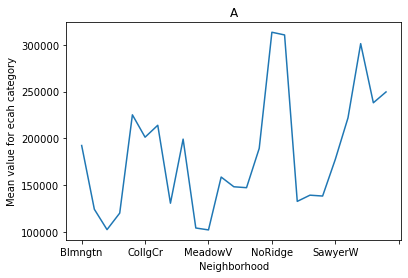

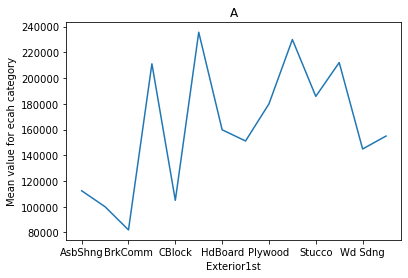

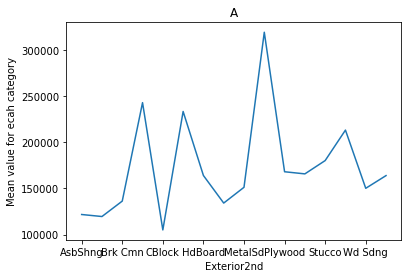

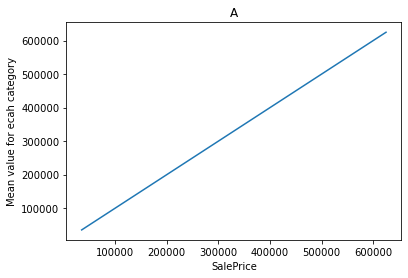

In [10]:
for i in x_train.columns:
    fig = plt.figure()
    x_train.groupby([i])['SalePrice'].mean().plot()
    plt.title('A')
    plt.ylabel('Mean value for ecah category')
    plt.show()

<AxesSubplot:xlabel='Neighborhood'>

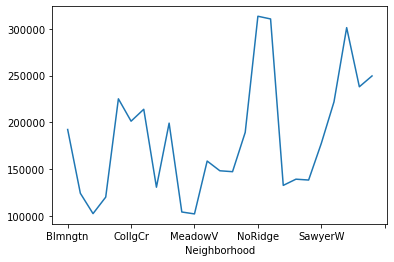

In [11]:
x_train.groupby(['Neighborhood'])['SalePrice'].mean().plot()

In [12]:
value = x_train.groupby(['Neighborhood'])['SalePrice'].mean().to_dict()

In [13]:
value

{'Blmngtn': 192309.6923076923,
 'Blueste': 124000.0,
 'BrDale': 102208.33333333333,
 'BrkSide': 119879.48717948717,
 'ClearCr': 225194.44444444444,
 'CollgCr': 201224.0693069307,
 'Crawfor': 213999.64864864864,
 'Edwards': 130500.93333333333,
 'Gilbert': 199134.64,
 'IDOTRR': 103945.83333333333,
 'MeadowV': 101890.0,
 'Mitchel': 158516.24242424243,
 'NAmes': 148104.59731543623,
 'NPkVill': 147125.0,
 'NWAmes': 189225.58823529413,
 'NoRidge': 313633.6296296296,
 'NridgHt': 310738.78,
 'OldTown': 132457.9125,
 'SWISU': 139098.85714285713,
 'Sawyer': 138186.36363636365,
 'SawyerW': 177444.36111111112,
 'Somerst': 221914.11111111112,
 'StoneBr': 301427.05263157893,
 'Timber': 238072.7037037037,
 'Veenker': 249687.5}

In [14]:
x_train['Neighborhood'] = x_train['Neighborhood'].map(value)
x_test['Neighborhood'] = x_test['Neighborhood'].map(value)

In [15]:
x_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
615,148104.597315,MetalSd,MetalSd,137500
613,158516.242424,VinylSd,VinylSd,147000
1303,221914.111111,VinylSd,VinylSd,232000
486,148104.597315,MetalSd,MetalSd,156000
561,158516.242424,HdBoard,HdBoard,170000


<AxesSubplot:xlabel='Neighborhood'>

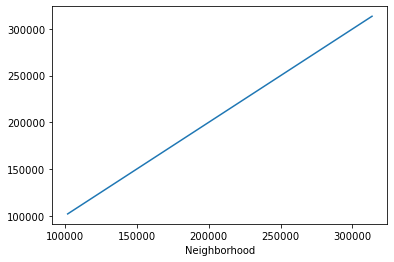

In [16]:
x_train.groupby(['Neighborhood'])['SalePrice'].mean().plot()

# Using Feature Engine

In [17]:
df = pd.read_csv('house_price.csv',usecols = ['Neighborhood' , 'Exterior1st' , 'Exterior2nd' , 'SalePrice'])

In [18]:
df.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.iloc[:,:]
y = df.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33 , random_state =42)

In [22]:
from feature_engine.encoding import MeanEncoder

In [23]:
od = MeanEncoder(variables=())

In [24]:
od.fit(x_train,y_train)

MeanEncoder(variables=())

In [25]:
od.encoder_dict_

{'Neighborhood': {'Blmngtn': 192309.6923076923,
  'Blueste': 124000.0,
  'BrDale': 102208.33333333333,
  'BrkSide': 119879.48717948717,
  'ClearCr': 225194.44444444444,
  'CollgCr': 201224.0693069307,
  'Crawfor': 213999.64864864864,
  'Edwards': 130500.93333333333,
  'Gilbert': 199134.64,
  'IDOTRR': 103945.83333333333,
  'MeadowV': 101890.0,
  'Mitchel': 158516.24242424243,
  'NAmes': 148104.59731543623,
  'NPkVill': 147125.0,
  'NWAmes': 189225.58823529413,
  'NoRidge': 313633.6296296296,
  'NridgHt': 310738.78,
  'OldTown': 132457.9125,
  'SWISU': 139098.85714285713,
  'Sawyer': 138186.36363636365,
  'SawyerW': 177444.36111111112,
  'Somerst': 221914.11111111112,
  'StoneBr': 301427.05263157893,
  'Timber': 238072.7037037037,
  'Veenker': 249687.5},
 'Exterior1st': {'AsbShng': 112426.66666666667,
  'AsphShn': 100000.0,
  'BrkComm': 82000.0,
  'BrkFace': 211124.24242424243,
  'CBlock': 105000.0,
  'CemntBd': 235642.66666666666,
  'HdBoard': 159823.78523489932,
  'MetalSd': 151124.32

In [26]:
od.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [27]:
od.n_features_in_

4

In [28]:
x_train = od.transform(x_train)

In [29]:
x_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
615,148104.597315,151124.324138,151140.482014,137500
613,158516.242424,212076.332394,213056.524496,147000
1303,221914.111111,212076.332394,213056.524496,232000
486,148104.597315,151124.324138,151140.482014,156000
561,158516.242424,159823.785235,163913.094891,170000


In [30]:
x_test = od.transform(x_test)

In [31]:
x_test.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
892,138186.363636,159823.785235,163913.094891,154500
1105,313633.629630,159823.785235,163913.094891,325000
413,132457.912500,154956.666667,163810.344828,115000
522,119879.487179,235642.666667,233225.368421,159000
1036,238072.703704,212076.332394,213056.524496,315500
